In [ ]:
Student Name: Sung Hoon Bae

Instructor Name: James Irving

Review Date: 12/08/2020

In [152]:
import warnings
warnings.filterwarnings(action='ignore')
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import re

import src.useful_codes as uc
import pickle
import vaderSentiment

# Introduction

## Business Case
As of January of 2020, there are approximately 145 million users on Twitter. 22% of Americans are on Twitter and 500 million tweets are sent each day globally. This is why many companies internationally use Twitter for marketing. In fact 80% of Twitter users have mentioned a brand in a tweet, and 77% of Twitter users feel more positive when their tweets have been replied by the mentioned brand [1].

We believe that Twitter is one of the platforms that provides people to share their opinion, evaluations, attitudes, and emotions about virtually anything including certain products freely, and for any companies, this is like a gold mine waiting to be mined for `opinions are central to almost all human activities and are key influencers of our behaviors` [2].


Sources:

[1] https://unsplash.com/photos/ulRlAm1ITMU

[2]. Bing Liu, https://www.morganclaypool.com/doi/abs/10.2200/s00416ed1v01y201204hlt016

## Goals
Create a dashboard that can
	
	[1] stream tweets with filters so that we listen to relevant key words and phrases,
	
	[2] effectively classify tweets into negative, neutral, and positive sentiments, and

	[3] Flag the strongly negative tweets so they can be dealt with if necessary.

# Data
We will be building our twitter sentiment model using a dataset that contains 1.4 million tweets provided by Kaggle. If you wish to download the dataset, you can go to this <a href='https://www.kaggle.com/kazanova/sentiment140'>LINK</a> to access the dataset.

In [3]:
# importing data
columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
permanent = pd.read_csv('datasets/tweet_sentiments.csv',
                        encoding='latin', header=None)
permanent.columns = columns

FileNotFoundError: ignored

## Processing Data

**Use the following codes if using Google Colab**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
DATA_PATH = 'drive/MyDrive/dataset/twitter_sentiment/'

In [ ]:
# importing data
columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
permanent = pd.read_csv(DATA_PATH+'/tweet_sentiments.csv',
                        encoding='latin', header=None)
permanent.columns = columns

Since we only care about the texts and their sentiments, we will drop other columns.

In [9]:
permanent = permanent[['sentiment', 'text']]

# Changes 0, 4 into categorical values: Negative and Positive
sentiment_dict = {0:'Negative', 4:'Positive'}
permanent['sentiment'] = permanent['sentiment'].apply(lambda x: sentiment_dict[x]);

### Class Balance

[Text(0, 0.5, 'Number of Tweets'),
 Text(0.5, 0, 'Sentiment'),
 Text(0.5, 1.0, 'Sentiment Distribution')]

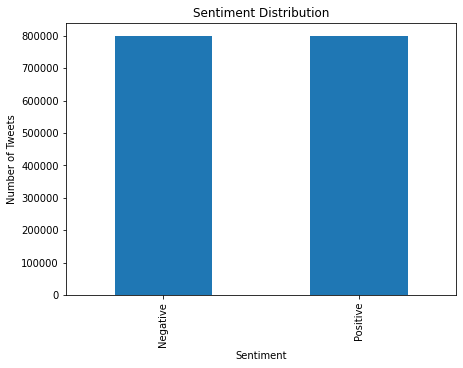

In [11]:
fig, ax = plt.subplots(figsize=(7,5))
permanent['sentiment'].value_counts().plot(kind='bar')
ax.set(xlabel='Sentiment', ylabel='Number of Tweets', title='Sentiment Distribution')

Lovely! No class imbalance!

### Spliting the data

In [146]:
# Define X and y
X = permanent['text']
y = permanent['sentiment']

# Splits test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80000, test_size=20000, random_state=42)

# Splits traint set into train and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.70, random_state=42)

# Machine Learning Model #1: TF-IDF Model

In [147]:
# Initiates models
nb = MultinomialNB()
lr = LogisticRegression(solver='liblinear')

In [148]:
data = {'X': X_train, 'y': y_train}

In [149]:
tfidf = TfidfVectorizer(tokenizer=uc.clean_text,
                        ngram_range=(1,3),
                        max_features=2000,
                        min_df=5, max_df=0.2)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72      9831
           1       0.74      0.67      0.70     10169

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000



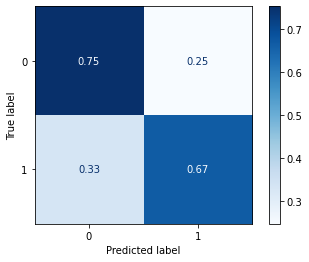

In [150]:
"""
tfidf = TfidfVectorizer(tokenizer=uc.clean_text,
                        ngram_range=(1,3),
                        max_features=2000,
                        min_df=5, max_df=0.2)
"""
nb_tfidf_model, report = uc.evaluate_binary_model(label='NB_lg_tfidf',
                                                  model='NB',
                                                  vectorizer=tfidf,
                                                  data=data)

In [ ]:
report

{'label': 'NB_lg_tfidf',
 'run_time': 1703.390268087387,
 'train_row': 120000,
 'test_row': 40000,
 'total_row': 160000,
 'negative_recall': 0.7564573812835287,
 'positive_recall': 0.7486410308033018,
 'test_accuracy': 0.752575,
 'average_time': 0.01064618917554617}

In [153]:
uc.save_data(nb_tfidf_model, 'models/nb_tfidf_model')

In [154]:
uc.save_data(report, 'models/nb_tfidf_model_report')

In [155]:
# binary_model = uc.load_data('models/nb_tfidf_model')

# def prototype(model='binary'):
#     user_input = input('Write a review: ')
    
# #     text = get_clean_text(user_input)
# #     word_emb = get_vector(text)
#     if model=='binary':
#         model = binary_model
#     else:
#         model = multiclass_word_emb
#     print('-'*30)
# #     print('Product: ', predict_product(text))
#     print('Sentiment: ', predict_sentiment(model, user_input))
#     print('Confidence: ', round(get_confidence(model, user_input)*100, 2), '%')
#     print('-'*30)
#     print('\n')
# def get_clean_text(text):
#     text = ' '.join(uc.clean_text(text))
#     return text

# def get_vector(text):
#     word_emb = np.concatenate(uc.get_vec(text).reshape(-1,1), axis=0).reshape(-1, 300)
#     return word_emb

# def predict_sentiment(model, text):
#     predict = model.predict([text])
#     return predict[0]

# def predict_product(text):
#     predict = product_predictor.predict(text)
#     return predict[0]

# def get_confidence(model, text):
#     prob = model.predict_proba([text])
#     return max(prob[0])

# Deep NLP  Model using Ktrain

## Data Preparation

In [13]:
# Splits test set
data_train, data_test = train_test_split(permanent, train_size=0.05, random_state=42)

# Splits traint set into train and validation set
data_train, data_val = train_test_split(data_train, train_size=0.70, random_state=42)

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
def clean_text(text, stopwords=False, tweet=True):
    """
    Cleans and tokenizes tweet text data.
    Args:
        text (str): tweet text data
        
        stopwords (bool): True if stopwords needs to be removed
        
        tweet (bool): True if text data are tweets.
    
    Returns:
        tokens (array): Array of tokenized words from given text.
    """

    if tweet:
        # text = re.sub(r'@\S+', '', text) # Gets rid of any mentions
        text = re.sub(r'RT\S+', '', text) # Gets rid of any retweets
        text = re.sub(r'#', '', text) # Gets rid of hashtag sign
        text = re.sub(r'https?:\/\/\S+', '', text) # Gets rid of any links
        # text = re.sub(r'[0-9]+.?[0-9]+', '', text) # Gets rid of X.X where X are numbers
        text = re.sub(r'#?(sx|Sx|SX)\S+', '', text) # Gets rid common mentions
        text = re.sub(r'(&quot;|&Quot;)', '', text) # Gets rid of quotes    
        text = re.sub(r'(&amp;|&Amp;)', '', text) # Gets rid of quotes
        text = re.sub(r'link', '', text) # Gets rid of quotes
    doc = nlp(text)

    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-': # if token is not a pronoun
            temp_token = token.lemma_.lower().strip()
        else:
            temp_token = token.lower_
        tokens.append(temp_token)
    
    if stopwords:
        tokens_stopped = [token for token in tokens if token not in stopwords_list]
    else:
        tokens_stopped = tokens
    
    return ' '.join(tokens_stopped)

In [2]:
# !pip install ktrain

In [17]:
data_train['clean_text'] = data_train['text'].apply(clean_text)

In [18]:
data_val['clean_text'] = data_val['text'].apply(clean_text)

In [ ]:
data_train.to_csv(DATA_PATH,'data_train.csv')
data_val.to_csv(DATA_PATH,'data_val.csv')

In [19]:
import ktrain
from ktrain import text

In [40]:
data_train

,sentiment,text,clean_text
1581102,Positive,@FeeshaC I read Brida already. It's an okay bo...,@feeshac i read brida already . it be an okay ...
356348,Negative,WHY WAIT AGAIN? I absolutely HATE waiting! one...,why wait again ? i absolutely hate wait ! one ...
1199758,Positive,#fr @zalete hey any pointer?,fr @zalete hey any pointer ?
1369983,Positive,My niece is here shhhhhh she's asleep,my niece be here shhhhhh she be asleep
149336,Negative,@SleeplessInATX didn't make it 2 the Frank Gom...,@sleeplessinatx do not make it 2 the frank gom...
...,...,...,...
533299,Negative,anyone got a job for me? i'm so looking for a ...,anyone get a job for me ? i be so look for a j...
1291820,Positive,love to @kaliie for buying me english lollies ...,love to @kaliie for buy me english lolly ( whi...
157462,Negative,express editing... no fun!!,express editing ... no fun ! !
1055327,Positive,Is layin out,be layin out


In [35]:
# Prepares the data for training
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df = data_train, 
                                                                       text_column = 'text',
                                                                       label_columns = 'sentiment',
                                                                       val_df = data_val,
                                                                       max_features=35000,
                                                                       maxlen = 512,
                                                                       preprocess_mode = 'bert')

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


## Defining the model

In [36]:
# creates model
model = text.text_classifier(name='bert',
                             train_data = (X_train, y_train),
                             preproc = preprocess)

Is Multi-Label? False
maxlen is 512
done.


In [37]:
# Get learning rate
learner = ktrain.get_learner(model = model, 
                             train_data = (X_train, y_train),
                             val_data = (X_test, y_test),
                             batch_size = 8) # max_len determines the batch size

## Calculating Optimal Learning Rate

In [27]:
# this might take days to run!!!!!
learner.lr_find(max_epochs=3) # finds best learning rate
learner.lr_plot() # plots learning rate
# Optimal learning rate for this model is _________.

simulating training for different learning rates... this may take a few moments...
Epoch 1/3
7000/7000 [==============================] - 3475s 496ms/step - loss: 0.0618 - accuracy: 0.9810
Epoch 2/3
7000/7000 [==============================] - 3471s 496ms/step - loss: 0.2192 - accuracy: 0.9125


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


TypeError: ignored

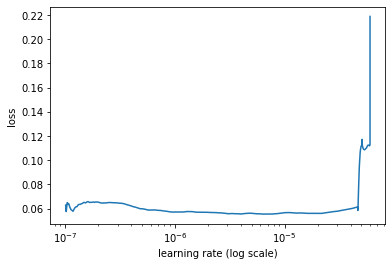

In [28]:
learner.lr_plot() 

> It seems like our optimal learning rate is between 10e-6 to 10-5!

## Training BERT #1: Learning Rate = 5e-5

**Fitting the model**

In [23]:
learner.fit_onecycle(lr = 5e-5, epochs = 3)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/3
7000/7000 [==============================] - 3830s 547ms/step - loss: 0.4125 - accuracy: 0.8127 - val_loss: 0.3947 - val_accuracy: 0.8249
Epoch 2/3
7000/7000 [==============================] - 3823s 546ms/step - loss: 0.3440 - accuracy: 0.8532 - val_loss: 0.3835 - val_accuracy: 0.8336
Epoch 3/3
7000/7000 [==============================] - 3820s 546ms/step - loss: 0.1698 - accuracy: 0.9357 - val_loss: 0.4731 - val_accuracy: 0.8358


**Saving the model**

In [25]:
# predictor
predictor = ktrain.get_predictor(learner.model, preprocess)
MODEL_PATH = 'drive/MyDrive/models/'
# saves the model
predictor.save(MODEL_PATH+'BERT_1') #ngram_5, max_len_400, max_feature20000

In [ ]:
predictor = ktrain.load_predictor('/tmp/mymnist')

## Training BERT #2: Learning Rate = 1e-5

**Fitting the model**

In [33]:
learner.fit_onecycle(lr = 1e-5, epochs = 5)



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/5
7000/7000 [==============================] - 4394s 628ms/step - loss: 0.4422 - accuracy: 0.7907 - val_loss: 0.3827 - val_accuracy: 0.8315
Epoch 2/5
7000/7000 [==============================] - 4303s 615ms/step - loss: 0.3454 - accuracy: 0.8494 - val_loss: 0.3661 - val_accuracy: 0.8401
Epoch 3/5
7000/7000 [==============================] - 4280s 611ms/step - loss: 0.2626 - accuracy: 0.8926 - val_loss: 0.4054 - val_accuracy: 0.8388
Epoch 4/5
7000/7000 [==============================] - 4284s 612ms/step - loss: 0.1329 - accuracy: 0.9503 - val_loss: 0.5138 - val_accuracy: 0.8348
Epoch 5/5
7000/7000 [==============================] - 4286s 612ms/step - loss: 0.0557 - accuracy: 0.9811 - val_loss: 0.6727 - val_accuracy: 0.8379


**Saving the model**

In [34]:
# predictor
predictor = ktrain.get_predictor(learner.model, preprocess)
MODEL_PATH = 'drive/MyDrive/models/'
# saves the model
predictor.save(MODEL_PATH+'BERT_2') #ngram_3, max_len_512, max_feature20000



## Training BERT #3: Learning Rate = 1e-5 with autofit

**Fitting the Model: it will automatically stop once the model does not get any better**

In [38]:
learner.autofit(1e-5)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 1e-05...
Epoch 1/1024
7000/7000 [==============================] - 4331s 619ms/step - loss: 0.4144 - accuracy: 0.8082 - val_loss: 0.3625 - val_accuracy: 0.8397
Epoch 2/1024
7000/7000 [==============================] - 4280s 611ms/step - loss: 0.3068 - accuracy: 0.8699 - val_loss: 0.3648 - val_accuracy: 0.8437
Epoch 3/1024
7000/7000 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9097
Epoch 00003: Reducing Max LR on Plateau: new max lr will be 5e-06 (if not early_stopping).
7000/7000 [==============================] - 4277s 611ms/step - loss: 0.2274 - accuracy: 0.9097 - val_loss: 0.4121 - val_accuracy: 0.8391
Epoch 4/1024
7000/7000 [==============================] - 4273s 610ms/step - loss: 0.1348 - accuracy: 0.9505 - val_loss: 0.5036 - val_accuracy: 0.8378
Epoch 5/1024
7000/7000 [==========

**Saving the model**

In [39]:
# predictor
predictor = ktrain.get_predictor(learner.model, preprocess)
MODEL_PATH = 'drive/MyDrive/models/'
# saves the model
predictor.save(MODEL_PATH+'BERT_3') #ngram_1, max_len_512, max_feature 35000



# Check Different Models

Accuracy isn't the everything we want form our model. We want to make sure our model can deliver what we want with efficiency. Here, we will compare TextBlob Model and BERT Model.|

## Preparing Test Data

In [5]:
import pandas as pd

In [172]:
# importing data
columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
permanent = pd.read_csv('datasets/tweet_sentiments.csv',
                        encoding='latin', header=None)
permanent.columns = columns

In [173]:
permanent = permanent[['sentiment', 'text']]

# Changes 0, 4 into categorical values: Negative and Positive
sentiment_dict = {0:0, 4:1}
permanent['sentiment'] = permanent['sentiment'].apply(lambda x: sentiment_dict[x]);

In [174]:
permanent.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [175]:
# Define X and y
X = permanent['text']
y = permanent['sentiment']

# Splits test set
_, X_test, _, y_test = train_test_split(X, y, test_size=1000, random_state=42)

Now, we will compare TextBlob vs. BERT in terms of accuracy and computational time.

In [91]:
result = []

## TextBlob

In [92]:
from textblob import TextBlob
import time
import datetime
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [191]:
def polarity(text):
    sentiment = TextBlob(text).polarity
    return 0 if sentiment < 0 else 1

In [105]:
result.append({'model': 'TextBlob', 'accuracy':None, 'negative_recall':None, 'average_computational_time':None})

In [192]:
# Speed
start_time = time.time()
text_blob = [polarity(text) for text in X_test]
end_time = time.time()
delta_time = (end_time - start_time)
result[0]['average_time_per_tweet (ms)'] = delta_time/1000 * 1000 # time per tweet in ms

In [193]:
# Accuracy 
result[0]['accuracy'] = accuracy_score(y_test, text_blob)
# Recall
result[0]['negative_recall']= recall_score(y_test, text_blob, average=None)[0]

In [194]:
result[0]

{'model': 'TextBlob',
 'accuracy': 0.631,
 'negative_recall': 0.3528225806451613,
 'average_time_per_tweet (ms)': 0.5769839286804199,
 'average_computational_time': 0.5260429382324219}

In [109]:
confusion_matrix(y_test, text_blob)

array([[368, 128],
       [251, 253]])

## BERT Model

In [110]:
import ktrain

In [111]:
predictor = ktrain.load_predictor('models/BERT_2')

In [112]:
result.append({'model': 'BERT', 'accuracy':None, 'negative_recall':None, 'average_computational_time':None})

In [118]:
# Speed
start_time = time.time()
bert =predictor.predict(list(X_test))
end_time = time.time()
delta_time = (end_time - start_time)
result[1]['average_time_per_tweet (ms)'] = delta_time/1000 * 1000 # time per tweet in ms

In [120]:
# Converts categorical to labels
bert = [0 if x=='Negative' else 1 for x in bert]

In [125]:
# Accuracy 
result[1]['accuracy'] = accuracy_score(y_test, bert)
# Recall
result[1]['negative_recall']= recall_score(y_test, bert, average=None)[0]

## VADER Model

In [157]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [167]:
analyser = SentimentIntensityAnalyzer()

In [168]:
result.append({'model': 'VADER', 'accuracy':None, 'negative_recall':None, 'average_computational_time':None})

In [187]:
def vader_analyzer(sentence):
    score = analyser.polarity_scores(sentence)
    return 1 if score['compound'] > 0 else 0

In [188]:
# Speed
start_time = time.time()
vader =[vader_analyzer(tweet) for tweet in X_test]
end_time = time.time()
delta_time = (end_time - start_time)
result[2]['average_time_per_tweet (ms)'] = delta_time/1000 * 1000 # time per tweet in ms

In [189]:
# Accuracy 
result[2]['accuracy'] = accuracy_score(y_test, vader)
# Recall
result[2]['negative_recall']= recall_score(y_test, vader, average=None)[0]

## Reult Comparison

In [198]:
result_df = pd.DataFrame(result)
result_df

,model,accuracy,negative_recall,average_time_per_tweet (ms)
0,TextBlob,0.631,0.352823,0.576984
1,BERT,0.834,0.854839,833.463886
2,VADER,0.664,0.689516,0.122489


# Conclusion

## TextBlob

**Test Result (n=1000)**
    - Accuracy = 62.1%
    - Negative Recall = 74.2%
    - Time per tweet = 0.577 ms

**Pros:**
    - It's very simple to use.
    - Potentially use for other languages since it's powered by Google Translate.
**Cons:**
    - It is relative fast (compared to Deep NLP and NLTK) but slower than spacy.
    - It does not provide features like dependency parsing, word vectors etc. which is provided by spacy.

Source: https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

## BERT

**Test Result (n=1000)**
    - Accuracy = 83.4%
    - Negative Recall = 85.5%
    - Time per tweet =833.5 ms

**Pros:**
    - It's powerful and can be used for other NLP purposes other than sentiments.
    - High accuracy.
**Cons:**
    - It is slow to train and execute.

## VADER

**Test Result (n=1000)**
    - Accuracy = 66.4%
    - Negative Recall = 69.0%
    - Time per tweet = 0.122 ms

**Pros:**
    - It works exceedingly well on social media type text, yet readily generalizes to multiple domains
    - It doesn’t require any training data but is constructed from a generalizable, valence-based, human-curated gold standard sentiment lexicon
    - It is fast enough to be used online with streaming data, and
    - It does not severely suffer from a speed-performance tradeoff.
**Cons:**
    - Low accuracy and recall
    
Source: https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f

## Final Remark

We will use VADER to prelimarily filter any neutral tweets, then use BERT to analyze more extreme end tweets.

# Dashboard

## Keyword Selection

<img src='images/dashboard_1.png'>

**Keyword**
You are able to select up to two keywords to monitor online. If you choose to choose two keywords, you **must** separate them by a comma!

*if no keyword is selected, then it streams 

**Graph1**
This graph represents moving average value of sentiments towards the keywords you have selected along with number of tweets sent.

**Graph2**
This pie graph represents sentiment distribution towards your keyword.

<img src='images/dashboard_2.png'>

By clicking `Generate Word Cloud`, it generates frequently used words in tweets related to the keywords for each sentiment. 

<img src='images/dashboard_3.png'>

**Table1**
This table shows recent tweets sent filtered by the keywords chosen. You are able to click on `link` button to access the actual tweet.

**Table2**
This table shows recent flagged tweets that are strongly negative.

**Saving data into .csv file**
You **must** click `GENERATE CSV FILE` before you can download the files. You can either download the whole raw tweet data or just the flagged ones.

# Further Studies

1. Database structure
    - As the database size increases, it might get too much for sqlite3 to handle. So, we want to separate database into parts so only when a large number of data is requested, we can combine or join smaller databases. 
2. Reply feature
    - It would be nice if we could add a feature where you could reply to any of tweets shown in the dashboard without going to twitter page.
3. Multiple keywords
    - It would be nice if multiple keywords can be analyzed and followed at a given time.
4. Table Editing Mode
    - Modify flagged tweets in the dashboard so that a user can classify flagged tweets as 'resolved', 'false negative', or 'other' for further customer service / data analysis.
5. Further analysis on both positive and negative tweets
    - Find any correlation between tweet trends with how the company is doing to help with future direction of a company.
